In [8]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

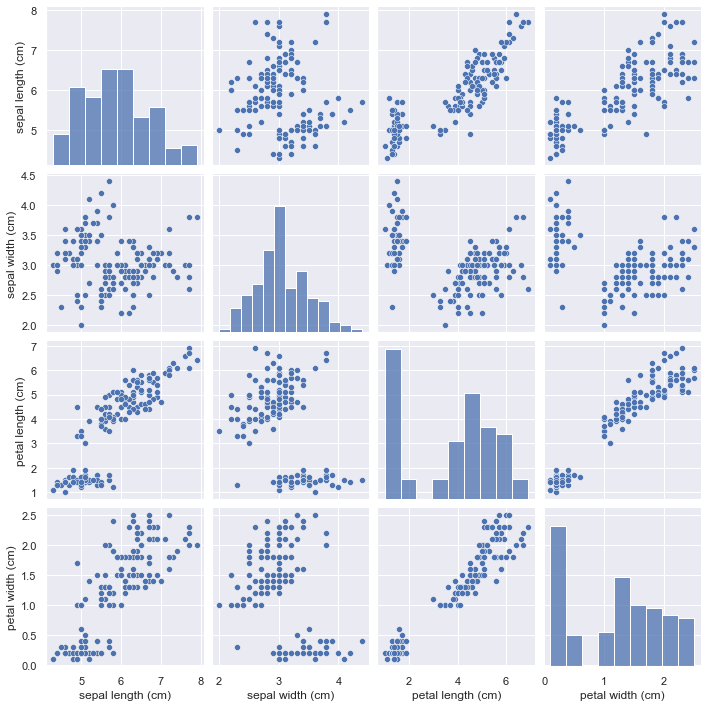

In [14]:
# using scatter plot to see the general overview and outliers:
import seaborn as sns
sns.set()

sns.pairplot(pd.DataFrame(iris.data, columns=iris.feature_names))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# before making the split function shuffles the dataset using a pseudorandom number generator
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=0)
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# evaluate model accuracy:
acc=model.score(X_test, y_test)
# another way: acc=np.mean(predictions==y_test)
acc # = 0.97 -> 97% of the flowers in the test set were predicted correctly

0.9736842105263158

The more complex we allow our model to be, the better we will be able to predict on the training data. However, if our model 
becomes too complex, we start focusing too much on each individual data point in our training set, 
and the model will not generalize well to new data.

the larger variety of data points your dataset contains, the more complex a model you can use without overfitting.
However, simply duplicating the same data points or collecting very similar data will not help.

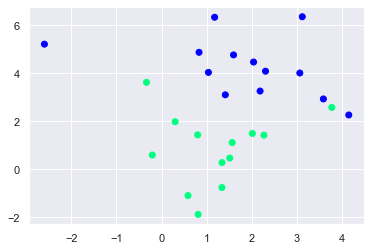

In [35]:
# *******************************************SUPERVISED LEARNING:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=26, centers=2, cluster_std=1.4, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')



In [41]:
# CLASSIFICATION - CANCER MALIGNANT OR BENIGN: 

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()
cancer.target_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [54]:
# how many samples contain each group

import numpy as np

x=zip(cancer.target_names,np.bincount(cancer.target))
list(x)

[('malignant', 212), ('benign', 357)]

In [76]:
# or:
import pandas as pd

df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df=pd.concat([df, pd.Series(cancer.target)], axis=1).rename(columns={0:'target'})
df.groupby('target')['target'].count()

target
0    212
1    357
Name: target, dtype: int64

In [131]:
# KNN - after training the dataset, for each test point there are extracted the closest neighbors 
# (its number id provided as a parameter) for each test point, we count how many neighbors belong to class 0 and 
# how many neighbors belong to class 1.  We then assign the class that is more frequent: 
# in other words, the majority class among the k-nearest neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)


In [132]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

acc= model.score(X_test, y_test)
acc

0.9230769230769231

In [130]:
# REGRESSION - BOSTON HOUSING:

from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])